In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import houseprice_functions as hpf
%load_ext autoreload
%autoreload 2

In [2]:
HousePrices = pd.read_csv('data/train.csv')
cleaned_hp = pd.read_csv('data/cleaned_houseprice.csv')
y = np.log(HousePrices['SalePrice'])
X = cleaned_hp.drop(['Id'],axis = 1)

X.head()

,CentralAir,HeatingQC,garage_score,Heating,Electrical,GarageArea,TotalBsmtSF,finishedbsmt,2Types,Basment,...,Ext_Stucco,Ext_WdSdng,Ext_WdShing,House_1.5Fin,House_1.5Unf,House_2.5Fin,House_2.5Unf,House_2Story,House_SFoyer,House_SLvl
0,1,5,6,1,5,548,856,0.824766,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,5,6,1,5,460,1262,0.774960,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5,6,1,5,608,920,0.528261,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,4,6,1,5,642,756,0.285714,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,5,6,1,5,836,1145,0.572052,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
ols = linear_model.LinearRegression()
scores = cross_val_score(ols, X, y, cv=10)
predictions = cross_val_predict(ols, X, y, cv=10)
print(
    "RMSE:",
round(np.sqrt(metrics.mean_squared_error(y, predictions)),4)
)

RMSE: 0.1442


In [4]:
ols = linear_model.LinearRegression()
full_model = ols.fit(X,y)
print("beta_1: " + str(np.round(full_model.coef_, 3)))
print("beta_0: " + str(np.round(full_model.intercept_, 3)))
print("RSS: %.2f" % np.sum((full_model.predict(X) - y) ** 2))
print("R^2: %.5f" % full_model.score(X, y))

beta_1: [ 0.055  0.008  0.022  0.057 -0.014  0.     0.     0.05  -0.164 -0.013
 -0.025 -0.072 -0.025  0.064 -0.009 -0.015  0.     0.021  0.041  0.037
  0.019  0.002 -0.263  0.395  0.023  0.013  0.012  0.01   0.    -0.008
 -0.012 -0.082 -0.061 -0.039 -0.07  -0.109  0.01  -0.036  0.074  0.028
 -0.053 -0.058  0.031  0.089  0.059  0.138 -0.045  0.067 -0.015 -0.224
  0.022 -0.015  0.013  0.153  0.196 -0.027 -0.008  0.004  0.054  0.131
  0.212  0.09   0.109 -0.017 -0.027  0.009  0.048 -0.029 -0.086 -0.389
 -0.01   0.004 -0.058 -0.064 -0.033  0.016  0.022 -0.078 -0.065  0.025
  0.014  0.016  0.    -0.068 -0.    -0.003  0.     0.    -0.008  0.043
  0.    -0.028  0.034 -0.213  0.064 -0.087  0.027 -0.044  0.026 -0.007
 -0.018 -0.022 -0.079 -0.044 -0.042 -0.034  0.016 -0.102  0.033 -0.075
 -0.021 -0.032]
beta_0: 16.547
RSS: 21.45
R^2: 0.90785



Training average: 0.9125977073905231 
Testing average: 0.8562196917491026


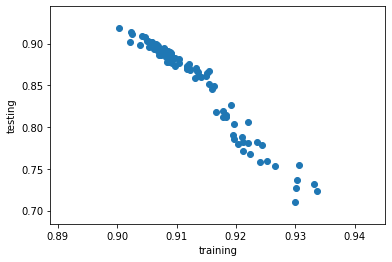

In [5]:
train = []
test = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    ols.fit(X_train,y_train)
    train.append(ols.score(X_train,y_train))
    test.append(ols.score(X_test,y_test))
print(
    '\nTraining average:',
    np.mean(train),
    '\nTesting average:',
    np.mean(test)
)


plt.scatter(train,test)
plt.xlabel('training')
plt.ylabel('testing')
plt.show()

#Training average: 0.9125977073905231 
#Testing average: 0.8562196917491026

#Training average: 0.9162656759980746 
#Testing average: 0.8709036270710832